## Classification Neural Network

Импортируем библиотеки и "законсервированный" подготовленный датасет.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
#!pip install Tensorflow

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Прописываем структуру нейронной сети.  Функцию тангенса мы не используем, так как нам не подходит её диапазон. Наиболее оптимальным вариантом является sigmoid. На выходе у нас 1 нейрон.

In [5]:
cnn = Sequential()

cnn.add(Dense(7, activation = 'sigmoid', input_dim = 7))

cnn.add(Dense(5, activation = 'sigmoid'))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
import sys
sys.setrecursionlimit(10000)

Проводим обучение нашей сети. Эспериментальным путём получили, что оптимальный размер партии = 8 , а количество эпох = 50.

In [7]:
history = cnn.fit(X_train, y_train, batch_size = 8, epochs = 50, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 0s 19ms/step - loss: 0.8027 - accuracy: 0.3725 - val_loss: 0.8938 - val_accuracy: 0.2308
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.7905 - accuracy: 0.3725 - val_loss: 0.8772 - val_accuracy: 0.2308
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7796 - accuracy: 0.3725 - val_loss: 0.8606 - val_accuracy: 0.2308
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7700 - accuracy: 0.3725 - val_loss: 0.8449 - val_accuracy: 0.2308
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7603 - accuracy: 0.3725 - val_loss: 0.8302 - val_accuracy: 0.2308
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.3725 - val_loss: 0.8168 - val_accuracy: 0.2308
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7420 - accuracy: 0.3725 - val_loss: 0.8037 - val_accuracy: 0.2308
Epoch 8/50
7/7 [=================

Теперь проанализируем графики ошибок обучения и тестирования. Ошибки сводятся к минимуму к 50 эпохе, при этом сеть остается не переобученной.

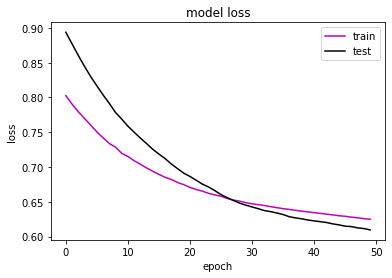

In [8]:
plt.figure()
plt.plot(history.history['loss'],'m')
plt.plot(history.history['val_loss'],'k')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Выбираем порог отсечения также путём множества экспериментов. И в итоге имеем его равным 0,45.

In [23]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.45)

Проанализируем таблицу сопряжённости. Видим, что сеть 9 объектов распознала верно и 4 нет. Точность модели: 69%. Доля ошибок: 31%. Это максимально хороший результат, которого мне удалось добиться, экспериментируя с параметрами сети и тд.

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8 2]
 [2 1]]


## Вывод по классификации

Сравнивая логистическую регрессию и НС сети для классификации, делаем вывод, что НС дала более точную модель, которая позволила распознать верно 69% объектов. Напомню, что мы работали с классификацией по уровню успешности, где были успешные и неуспешные торговые точки. Оба способа классификации гораздо лучше распознают неуспешные точки. Делая выбор в пользу НС, мы должны быть готовы к тому, что она лучше распознаёт неуспешные точки (8), чем успешные (1). Да, её построение сложнее, но точность на 15% выше, даже не смотря на то, что логистическая строилась на значимых факторах.